<a href="https://colab.research.google.com/github/Parsar22/DATA3320/blob/main/DATA_3320_Seattle_NYC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this notebook, we will explore [cleaned](https://github.com/Parsar22/DATA3320/blob/87316140006e551e2cff58958d5a1de65fca0a3a/clean_seattle_nyc_weather.csv) weather data obtained from Seattle Tacoma airport and JFK airport. Our objective is to compare the precipitation levels between Seattle and New York City to determine which city experiences more rainfall. By analyzing the weather data from these two airports, we aim to gain insights into the differences in rainfall patterns between the two cities.

## Import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

We'll use data obtained from The NOAA National Centers for Environmental Information to collect data related to Seattle Weather and New York's weather for the 3 year period January 2020 - January 2024. this data can be requested using This [Link](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND). This data was cleaned for the purpose of this project to only include the necessary fields and converted to a tidy format. the cleaned data is accessible using this [link](https://github.com/Parsar22/DATA3320/blob/87316140006e551e2cff58958d5a1de65fca0a3a/clean_seattle_nyc_weather.csv). click [this](https://github.com/Parsar22/DATA3320/blob/87316140006e551e2cff58958d5a1de65fca0a3a/Data_preperation.ipynb) to access the colab notebook used to clean the data

In [22]:
url = 'https://raw.githubusercontent.com/Parsar22/DATA3320/main/clean_seattle_nyc_weather.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,date,city,precipitation,month,year
2917,2917,2023-12-27,SEA,0.10,12,2023
2918,2918,2023-12-28,SEA,0.08,12,2023
2919,2919,2023-12-29,SEA,0.00,12,2023
2920,2920,2023-12-30,SEA,0.10,12,2023
2921,2921,2023-12-31,SEA,0.00,12,2023


this data set contains the precipitation data from both JFK and Seatac weather stations. each row contains the precipitation information for a signle day between january of 2020 to december of 2023.

## Questions

The Questions that need to be answered for this project are listed below :


1.   How does the average precipitation in Seattle compare to New York City across the entire dataset?
2.   Which city has the highest total annual precipitation?
3.   What is the average monthly precipitation in Seattle and New York City
4.   Is there any seasonal rainfall trends between Seattle and New york


## Analysis

To come up with a generanl answer we can use the mean() function on the precipitation column of the data set and group the result by city.

In [11]:
avg_precip_by_city = df.groupby('city')['precipitation'].mean()

print("Average Precipitation (Entire Dataset):")
print(avg_precip_by_city)

Average Precipitation (Entire Dataset):
city
NYC    0.118207
SEA    0.109568
Name: precipitation, dtype: float64


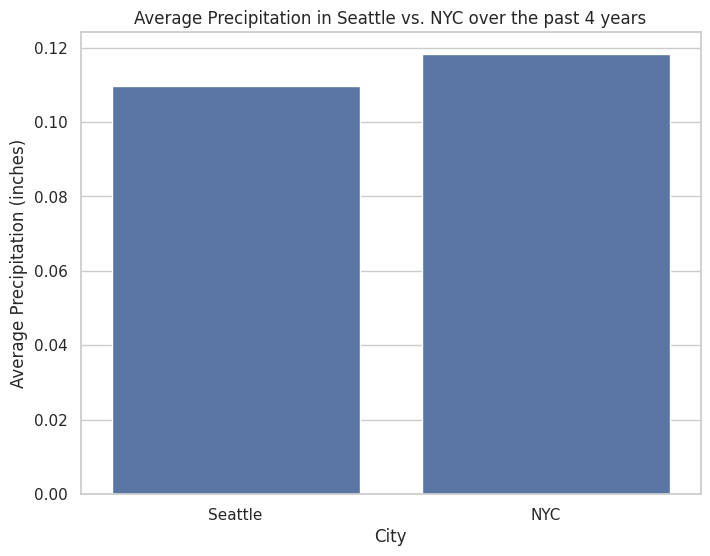

In [12]:
avg_precip_seattle = df[df['city'] == 'SEA']['precipitation'].mean()
avg_precip_nyc = df[df['city'] == 'NYC']['precipitation'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Seattle', 'NYC'], y=[avg_precip_seattle, avg_precip_nyc])
plt.xlabel('City')
plt.ylabel('Average Precipitation (inches)')
plt.title('Average Precipitation in Seattle vs. NYC over the past 4 years')
plt.show()

As seen in the data, NYC typically gets more rainfall on average compared to Seattle, suggesting a general trend of higher precipitation in NYC. However, to fully grasp the rainfall patterns in both cities, we need to dig deeper into the analysis.

We can calculate and compare the average Seasonal precipitation in Seattle and New York City.

In [19]:
def get_season(month):
  month_int = int(month)
  if month_int in (3, 4, 5):
    return "Spring"
  elif month_int in (6, 7, 8):
    return "Summer"
  elif month_int in (9, 10, 11):
    return "Fall"
  else:
    return "Winter"

df['season'] = df['month'].apply(get_season)

avg_precip_by_city_season = df.groupby(['city', 'season'])['precipitation'].mean()

print("\nAverage Precipitation by City and Season:")
for i, (city, data) in enumerate(avg_precip_by_city_season.unstack().iterrows()):
  print(f"{city}:")
  print(data)


Average Precipitation by City and Season:
NYC:
season
Fall      0.139038
Spring    0.109158
Summer    0.110299
Winter    0.114488
Name: NYC, dtype: float64
SEA:
season
Fall      0.130165
Spring    0.079212
Summer    0.028569
Winter    0.202574
Name: SEA, dtype: float64


We can see that NYC has a more consistant seasonal rainfall trend whereas in Seattle we have high rainfall during Winter and Fall and really low rainfall during Spring and Summer

### Results for communication assignment

Visualizing the Seasonal trend :

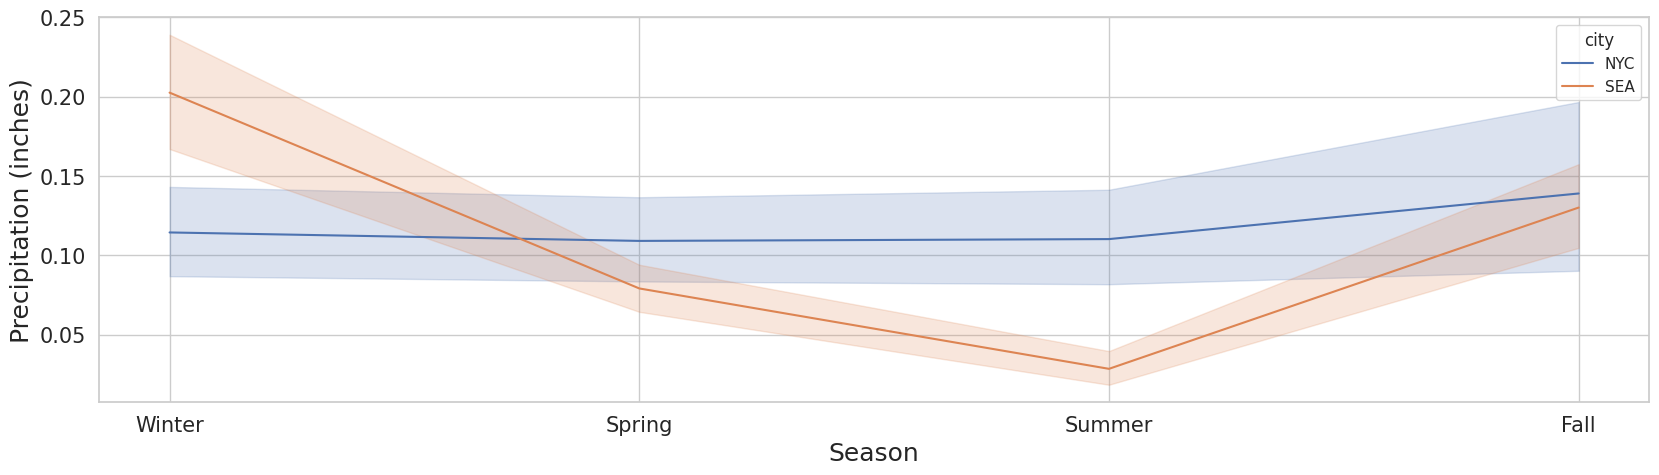

In [20]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='season', y='precipitation', hue='city')

plt.xlabel('Season', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)


plt.tick_params(labelsize=15);

We can see the seasonal trend with this visualization. this again shows the consistant trend with NYC and a curved trend for Seattle.

Below we'll look at the monthly precipitation trend between NYC and Seattle.

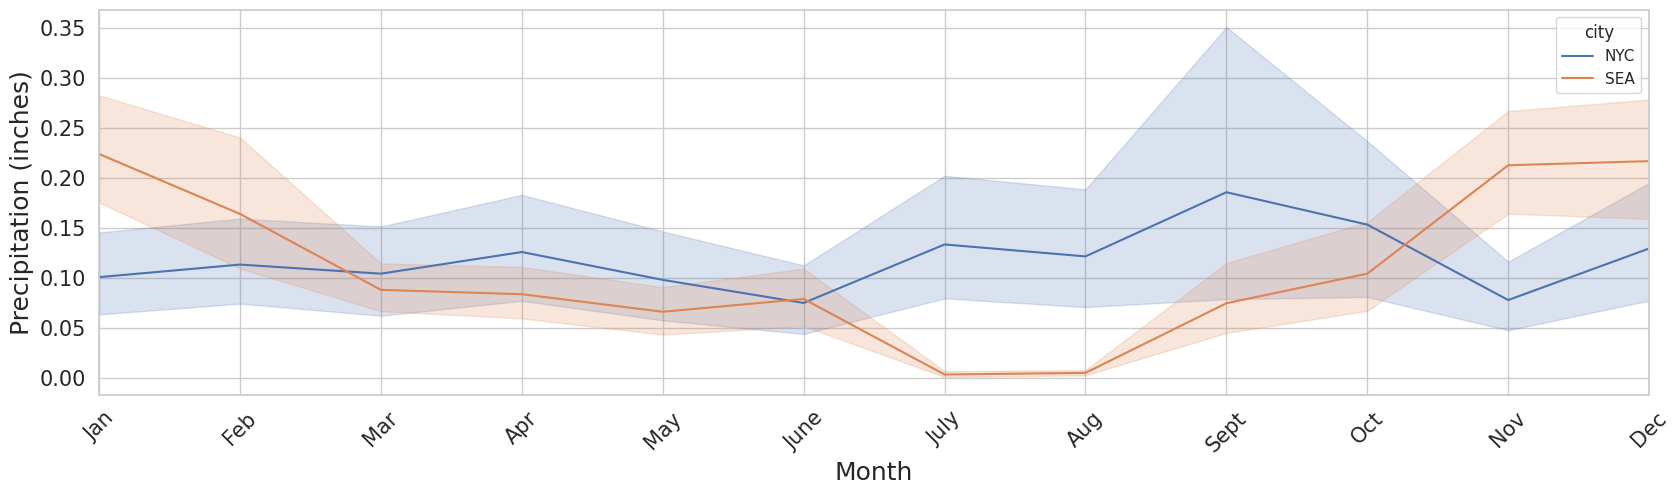

In [11]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlim(1, 12)
plt.tick_params(labelsize=15);

The observed trend aligns with our previous findings: NYC experiences higher or comparable precipitation levels from March to October, while Seattle sees more rainfall during the remaining months.

We can also see if this trend has been the same during the past 4 years. and if anything has changed.

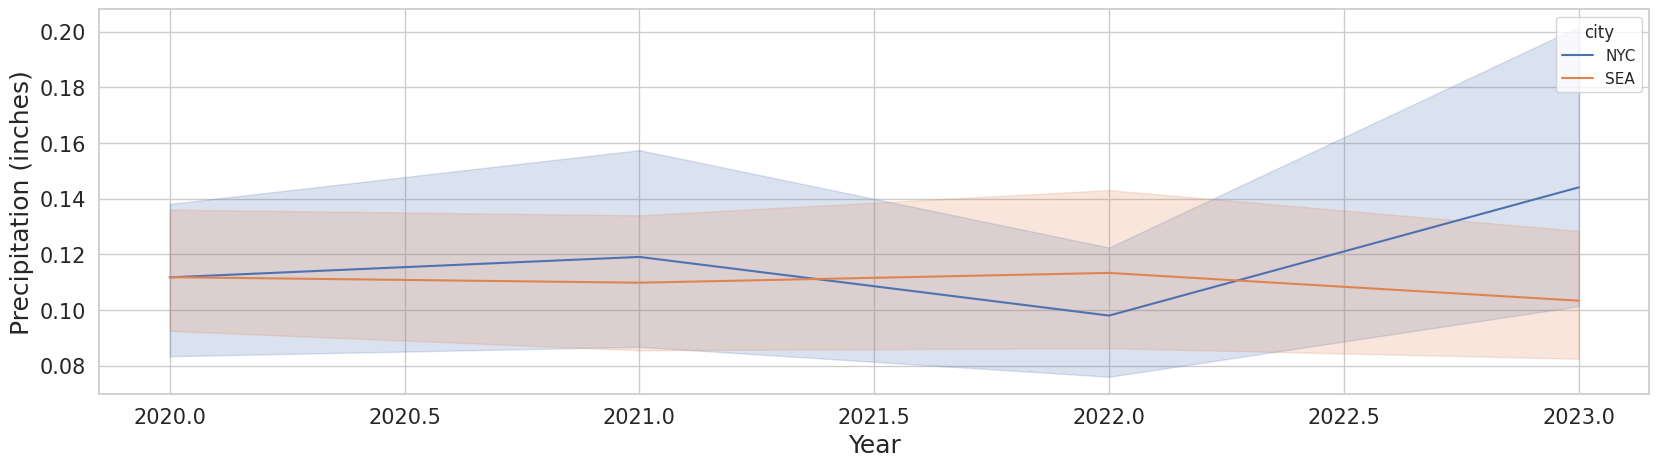

In [26]:
plt.figure(figsize=(20,5))


sns.lineplot(data=df, x='year', y='precipitation', hue='city')

plt.xlabel('Year', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

Yearly precipitation trends for Seattle and New York City show consistent patterns, with similar levels of rainfall observed between the two cities. However, 2022 stands out with distinct deviations. Overall, both cities exhibit stable precipitation patterns over the examined period.

## Conclusion

 Despite NYC generally receiving more precipitation, the analysis highlights distinct seasonal and monthly precipitation patterns between Seattle and NYC. Seattle experiences more pronounced seasonal variations, with higher rainfall during the winter and fall, while NYC maintains a relatively consistent rainfall pattern throughout the year.